In [10]:
!pip install chart_studio
!pip install subprocess

ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)
ERROR: No matching distribution found for subprocess


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!wget -O raw_data.csv "https://raw.githubusercontent.com/minhlq2003/DA_week04/refs/heads/main/Bitcoin%20Historical%20Data.csv"

import pandas as pd
import datetime
import pytz
def dateparse(time_str):
    try:
        # Nếu là số, chuyển thành datetime từ timestamp
        return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_str)))
    except ValueError:
        # Nếu là chuỗi ngày tháng, dùng pd.to_datetime
        return pd.to_datetime(time_str, errors="coerce")

data = pd.read_csv("raw_data.csv", converters={"Date": dateparse})

data.head()


--2025-03-15 03:03:04--  https://raw.githubusercontent.com/minhlq2003/DA_week04/refs/heads/main/Bitcoin%20Historical%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241167 (236K) [text/plain]
Saving to: ‘raw_data.csv’

raw_data.csv        100%[===================>] 235.51K  --.-KB/s    in 0.03s   

2025-03-15 03:03:04 (9.11 MB/s) - ‘raw_data.csv’ saved [241167/241167]



,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [13]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)

data.head()

<ipython-input-13-233a30a30532>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-13-233a30a30532>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-13-233a30a30532>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [14]:
data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize('UTC')

start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)

weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()

weekly_rows.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-05 00:00:00+00:00,274.8,264.7,278.3,262.9,54.99K,3.82%
1,2015-01-12 00:00:00+00:00,269.3,264.8,273.1,263.3,25.39K,1.72%
2,2015-01-19 00:00:00+00:00,215.9,210.6,219.5,205.5,31.58K,2.49%
3,2015-01-26 00:00:00+00:00,269.2,252.1,310.9,251.5,105.71K,6.78%
4,2015-02-02 00:00:00+00:00,238.9,225.3,242.5,220.5,39.02K,6.02%


In [15]:
weekly_rows['Open'] = weekly_rows['Open'].replace({',': ''}, regex=True).astype(float)
weekly_rows['Price'] = weekly_rows['Price'].replace({',': ''}, regex=True).astype(float)

trace1 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Open'],
    mode='lines',
    name='Open'
)


trace3 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Price'],
    mode='lines',
    name='Weighted Avg'
)

layout = dict(
    title='Historical Bitcoin Prices (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)

data = [trace1, trace3]

fig = dict(data=data, layout=layout)


from plotly.offline import iplot
iplot(fig, filename="Time Series with Rangeslider")

In [16]:
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3  # 1K = 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6  # 1M = 1,000,000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9  # 1B = 1,000,000,000
    return float(value)

weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Vol.'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [17]:
weekly_rows.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-05 00:00:00+00:00,274.8,264.7,278.3,262.9,54990.0,3.82%
1,2015-01-12 00:00:00+00:00,269.3,264.8,273.1,263.3,25390.0,1.72%
2,2015-01-19 00:00:00+00:00,215.9,210.6,219.5,205.5,31580.0,2.49%
3,2015-01-26 00:00:00+00:00,269.2,252.1,310.9,251.5,105710.0,6.78%
4,2015-02-02 00:00:00+00:00,238.9,225.3,242.5,220.5,39020.0,6.02%


In [18]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd


trace = go.Scattergl(
    x=weekly_rows['Price'].astype(float),
    y=weekly_rows['Vol.'].astype(float),
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

layout = go.Layout(
    title='BTC Volume vs USD',
    xaxis=dict(
        title=dict(
            text='Weighted Price',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=dict(
        title=dict(
            text='Volume BTC',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='compare_webgl')

In [19]:
data = pd.read_csv('raw_data.csv',parse_dates=[0], date_parser=dateparse)
data.head()

<ipython-input-19-ed35b2f9cb25>:1: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [20]:
data = pd.read_csv('raw_data.csv',parse_dates=[0], date_parser=dateparse)
data['Date'] = data['Date'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Date', freq='H')]).first().reset_index()
data = data.set_index('Date')
data = data[['Price']]
data['Price'].fillna(method='ffill', inplace=True)
data['Price'] = data['Price'].replace({',': ''}, regex=True).astype(float)

<ipython-input-20-eeba8dd68fdd>:1: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

<ipython-input-20-eeba8dd68fdd>:3: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-20-eeba8dd68fdd>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-20-eeba8dd68fdd>:6: FutureWarning:

Series.fillna with 'method' i

In [21]:
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [22]:
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

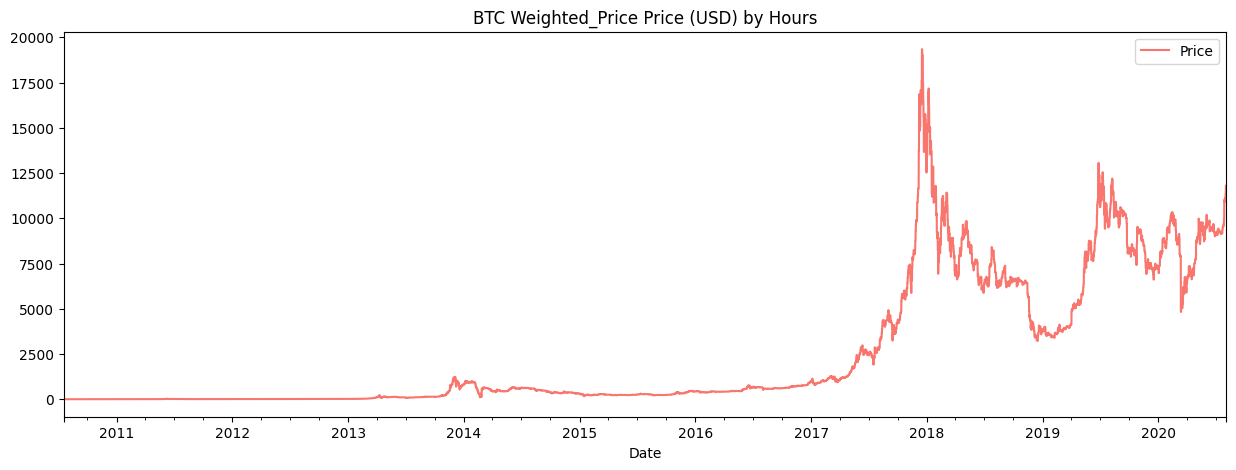

In [23]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

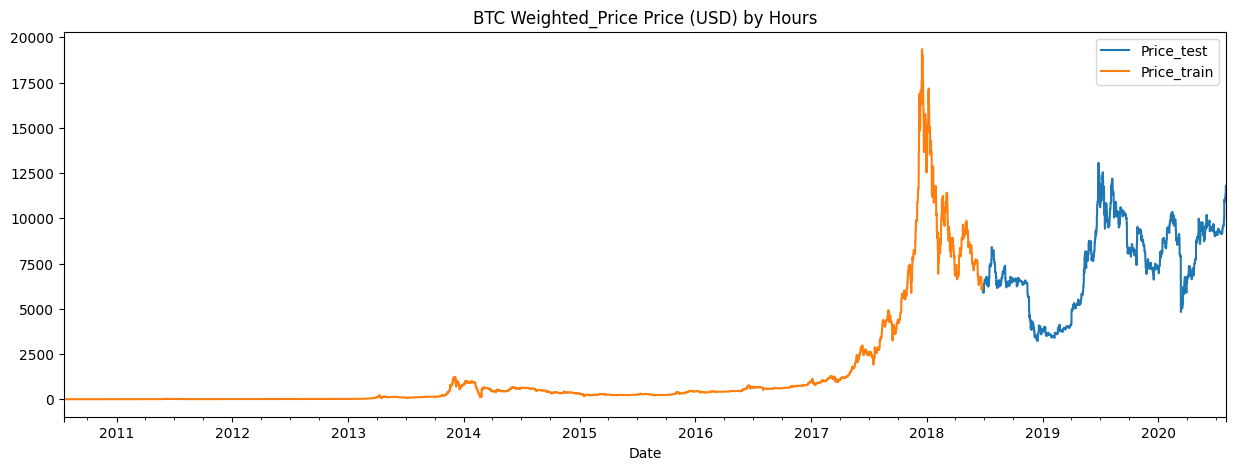

In [24]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(
        data_train.rename(columns={'Weighted_Price': 'Training Set'}),
        how='outer',
        lsuffix='_test',  # Thêm hậu tố cho cột trùng tên từ data_test
        rsuffix='_train'  # Thêm hậu tố cho cột trùng tên từ data_train
    ) \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
df = pd.read_csv("raw_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
def convert_volume(value):
    if isinstance(value, str):
        if value == '-':
            return np.nan
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
    return float(value)

df['Vol.'] = df['Vol.'].apply(convert_volume)

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)


data = df[['Date', 'Price']]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Price']])

In [28]:
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(data_scaled, sequence_length)

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Khởi tạo mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, 1)))  # LSTM 1 với return_sequences=True
model.add(Dropout(0.2))  # Dropout để tránh overfitting
model.add(LSTM(64, return_sequences=False))  # LSTM 2 không cần return_sequences
model.add(Dropout(0.2))
model.add(Dense(25))  # Lớp ẩn Dense
model.add(Dense(1))  # Lớp output (1 giá trị dự báo)

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
91/91 - 16s - 181ms/step - loss: 0.0014 - val_loss: 9.9768e-04
Epoch 2/50
91/91 - 7s - 76ms/step - loss: 8.8695e-04 - val_loss: 0.0012
Epoch 3/50
91/91 - 5s - 56ms/step - loss: 7.7456e-04 - val_loss: 7.8678e-04
Epoch 4/50
91/91 - 6s - 69ms/step - loss: 5.4921e-04 - val_loss: 0.0011
Epoch 5/50
91/91 - 5s - 56ms/step - loss: 6.0808e-04 - val_loss: 7.1281e-04
Epoch 6/50
91/91 - 10s - 112ms/step - loss: 5.3224e-04 - val_loss: 6.6574e-04
Epoch 7/50
91/91 - 6s - 70ms/step - loss: 4.9420e-04 - val_loss: 0.0039
Epoch 8/50
91/91 - 9s - 96ms/step - loss: 5.5542e-04 - val_loss: 5.4883e-04
Epoch 9/50
91/91 - 7s - 74ms/step - loss: 3.7724e-04 - val_loss: 6.1120e-04
Epoch 10/50


In [ ]:
# Dự đoán trên tập test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Chuyển về giá trị thực tế

# Chuyển y_test về dạng thực tế để so sánh
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tính toán lỗi
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Vẽ biểu đồ so sánh dự đoán và thực tế
plt.figure(figsize=(14,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test_actual, label="Thực tế", color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label="Dự đoán", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Giá Bitcoin")
plt.title("Dự đoán giá Bitcoin bằng LSTM")
plt.legend()
plt.show()

In [ ]:
last_30_days = data_scaled[-sequence_length:]  # Lấy 30 ngày gần nhất
last_30_days = last_30_days.reshape((1, sequence_length, 1))  # Reshape đúng input LSTM

# Dự đoán
next_day_price_scaled = model.predict(last_30_days)
next_day_price = scaler.inverse_transform(next_day_price_scaled)  # Chuyển về giá thực tế

print(f"Giá Bitcoin dự đoán ngày tiếp theo: {next_day_price[0][0]:.2f} USD")